# Lecture 5.3: Webscraping

- In this lecture we will review how one can systematically go about collecting data from html sources.

- This has apparent utility as much data is provided on web, but the old school copy in paste is probably the least ideal way to grab data.

- Today's lecture was based of the website [towardsdatascience.com's](https://towardsdatascience.com/data-visualization-of-healthcare-expense-by-country-using-web-scraping-in-python-3cd85d4a9ac2) tutorial on grabbing expense data by country.

    - We will explore some data  provided by the [World Bank](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD?most_recent_value_desc=false&dynamic=true) which provides the average expenditure per capita by country.
    - Estimates of current health expenditures include healthcare goods and services consumed during each year.

- Writing a web scraping algorithm will not always be the most efficient way to grab data, but there are a couple instances when it is ideal:
    1. You have hundreds of web pages which are formatted identically from which you want to grab data.
    2. You want to grab data periodically from the same website and automating the process would save you time.
    
- **You will need to use your command prompt to install two new packages to use in Python:**
    1. `pip install beautifulsoup4`
    2. `pip install selenium`
- **If you have any questions over the course of this lecture, please post them to the 'Day 5 Lecture Questions' assignment on the Canvas course page.**

## Load relevant packages

- BeatifulSoup
    - 
    
- Selenium
    -

In [26]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

## WebDriver
- Selenium allows Python to easily download all of the html data.
- [Find](https://www.selenium.dev/downloads/) and download the appropriate WebDriver for the web browser you use the most.
    - Look under the 'Browsers' section of the above listed webpage.
    - Click documentation and download the appropriate WebDriver.
        - I will go through the steps with Chrome, but here is a link to [Safari](http://selenium-release.storage.googleapis.com/index.html?path=2.48/) where the appropriate webdriver is the file 'SavariDriver.safariextz'
            - Apparently Internet Explorer is a difficult installation so ideally you use another browser.
    - Save the ChromeDriver to you desktop and then you can easily navigate to the location on your computer and input the information in the code below.
    

In [44]:
driver = webdriver.Chrome("C:/Users/dl0ck/Desktop/chromedriver")

## Setting up our variables and grabbing HTML
- Here we set up two empty variables we want from the webpage 
- We use the `.get` attribute of `webdriver` to open the webpage we want.

In [45]:
country =[]
dailyExpense = []
driver.get('https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD?most_recent_value_desc=false&dynamic=true%27')

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en-us" data-reactroot="" data-reactid="1" data-react-checksum="-1439279932"><head data-reactid="2"><meta charset="utf-8" data-reactid="3" /><title data-react-helmet="true" data-reactid="4">Current health expenditure per capita (current US$) | Data</title><meta content="width=device-width, initial-scale=1, minimal-ui" name="viewport" data-reactid="5" /><meta content="IE=Edge" http-equiv="X-UA-Compatible" data-reactid="6" /><link href="/favicon.ico?v=1.1" rel="shortcut icon" data-reactid="8" /><meta name="google-site-verification" content="ByFDZmo3VoJURCHrA3WHjth6IAISYQEbe20bfzTPCPo" data-reactid="9" /><link href="/dist/main-7ad901de5c725e96f8b7.css" media="screen, projection" rel="stylesheet" type="text/css" data-reactid="10" /><script src="https://connect.facebook.net/signals/config/1458892451075570?v=2.9.18&amp;r=stable" async=""></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><scr
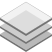

In [29]:
content

## Grab HTML

- We named the webpage we want `driver` and now we can grab the HTML from that webpage.
- We use the `BeautifulSoup` package which takes the HTML and makes it a `BeautifulSoup` object that we can perform specific functions on.

In [30]:
content = driver.page_source
soup = BeautifulSoup(content)



## HTML
- Now we find the appropriate tags that store the data we wish to extract.
- **< div >** tag refers to a division or a section of information
- **class** is an attribute of the section.

In [31]:
countries = soup.find_all('div',{'class':'item'})

## Extract the data into our variables.
- Now we have a for loop that reads through the data we want and extracts the Country and Expense data.
    - I will go line by line to explain what we are doing.
    - the `/365` line allows us to look at the average daily expense as we are viewing yearly data.

In [42]:
for i in range(1,190):
  country.append(countries[i].find_all('div',{'class':None})[0].text)
  dailyExpense.append(float(countries[i].find_all('div',{'class':None})[2].text.replace(',',''))/365)
 
Data = {'country': country,'expense': dailyExpense}

In [33]:
countries

[<div class="item title" data-reactid="319"><div class="th country" data-reactid="320"><span data-reactid="321">Country</span></div><div class="th most_recent_year" data-customlink="ss:body content" data-reactid="322"><span data-reactid="323">Most Recent Year</span></div><div class="th most_recent_value ascendant" data-customlink="ss:body content" data-reactid="324"><span data-reactid="325">Most Recent Value</span></div><div class="th sparkline" data-reactid="326"></div></div>,
 <div class="item" style="min-height: 58px;"><div data-customlink="nl:body content" data-text="Congo, Dem. Rep.">Congo, Dem. Rep.</div><div>2017</div><div>19.43</div><div></div></div>,
 <div class="item" style="min-height: 58px;"><div data-customlink="nl:body content" data-text="Mozambique">Mozambique</div><div>2017</div><div>21.07</div><div></div></div>,
 <div class="item" style="min-height: 58px;"><div data-customlink="nl:body content" data-text="South Sudan">South Sudan</div><div>2017</div><div>22.89</div><di

In [34]:
# We do range(1,190) because the first element is not actually the data we want
countries[0]

<div class="item title" data-reactid="319"><div class="th country" data-reactid="320"><span data-reactid="321">Country</span></div><div class="th most_recent_year" data-customlink="ss:body content" data-reactid="322"><span data-reactid="323">Most Recent Year</span></div><div class="th most_recent_value ascendant" data-customlink="ss:body content" data-reactid="324"><span data-reactid="325">Most Recent Value</span></div><div class="th sparkline" data-reactid="326"></div></div>

In [35]:
# Look to webpage to extract why we use 'class':None
(countries[188].find_all('div',{'class':None}))

[<div data-customlink="nl:body content" data-text="United States">United States</div>,
 <div>2017</div>,
 <div>10,246.14</div>,
 <div></div>]

In [36]:
# look at a specific country and notice that there are four elements in this list
# Country, year, price, and the closure of div
countries[5].find_all('div',{'class':None})

[<div data-customlink="nl:body content" data-text="Burundi">Burundi</div>,
 <div>2017</div>,
 <div>23.50</div>,
 <div></div>]

In [37]:
# notice that .text removes all of the HTML content leaving only what is in quotes
countries[5].find_all('div',{'class':None})[0].text

'Burundi'

In [41]:
# commas in data means we cannot change to number so we replace it
countries[188].find_all('div',{'class':None})[2]

<div>10,246.14</div>

In [39]:
# add .replace(',','')
(countries[188].find_all('div',{'class':None})[2].text.replace(',',''))

'10246.14'

## Convert to panda

In [43]:
Data = pd.DataFrame(Data)
Data

,country,expense
0,"Congo, Dem. Rep.",0.053233
1,Mozambique,0.057726
2,South Sudan,0.062712
3,"Gambia, The",0.063753
4,Burundi,0.064384
...,...,...
373,Iceland,16.674822
374,Norway,21.743507
375,Switzerland,27.277425
376,United States,28.071616
